# Diffusion for two grains in contact


Written by: Chandan Kumar Sahu

Integrated MSc. Physics, NISER Bhubaneswar, India

Supervisors: Dr. Priyadarshi Chowdhury (SEPS, NISER) and Dr. Subhasis Basak (SPS, NISER)

In [1]:
from grain_diffusion_code_pack import *

In [2]:
# Define the diffusivity coefficient, temperature, and oxygen fugacity
# These will be used to calculate the arrhenius diffusion coefficient
Diffusivity_array = []
Temperature_array = []
fO2_array = []


# OLID 10 data - Obtaining the optimum fit for diffusivity 

Calculating best fit for diffusion coefficient for Magnesium...
Diffusion coefficient: 0.010233 microns^2/hr or 2.8424e-18 m^2/s
Root mean square error: 0.002399011303080233



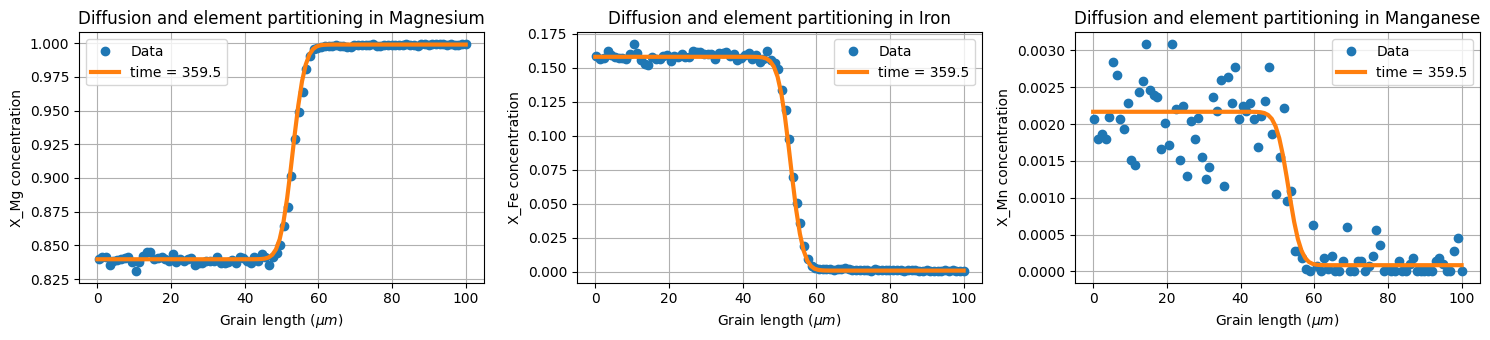

In [3]:
DATA = np.loadtxt('/home/ws1/Computational-Physics-Term-Paper-Project/Element_Partitioning_and_Diffusion/Data_files/PS2_OLID_10.csv', delimiter="\t", skiprows=6)
Dist = DATA[:, 0]-201       # Length of complete grain in microns
X_Mg = DATA[:, 2]           # Magnesium concentration
X_Fe = DATA[:, 3]           # Iron concentration
X_Mn = DATA[:, 1]           # Manganese concentration

# Constants and parameters
t_max = 360                 # total simulation time
L_grain1 = 54.5             # length of the grain 1
L_grain2 = 101-54.5         # length of the grain 2
dt = 0.5                    # time step
z_max = L_grain1 + L_grain2
dl = z_max / (len(Dist))    # spatial step
tol = 1e-6                  # tolerance for the minimization function

def source_term(x, t):
    return 0

########################################### X_Mg ###########################################

def init_X_Mg_left(X_Mg):
    # Initial condition for at the left side of the Magnesium data - average of the first 20 data points
    return np.average(X_Mg[:20])

def init_X_Mg_right(X_Mg):
    # Initial condition for at the right side of the Magnesium data - average of the last 20 data points
    return np.average(X_Mg[-20:-1])

def func_Mg(Diff):
    # Function to calculate the error for Magnesium
    solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, 
                                                                    init_X_Mg_left, init_X_Mg_right, source_term, 
                                                                    diff_matrix_isolated_boundary_G2)
    # Calculate Root Mean Square Error
    rmse = np.sqrt(np.sum(((X_Mg - solution_Mg[:, -1])**2))/len(X_Mg))
    return rmse

print('Calculating best fit for diffusion coefficient for Magnesium...')
# find the best fit for the diffusion coefficient by bisection method
Diff = find_min_solution(func_Mg, 1e-4, 1, tol=tol)

print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
print('Root mean square error:', func_Mg(Diff))
print()

########################################### X_Fe ###########################################

def init_X_Fe_left(X_Fe):
    # Initial condition for at the left side of the Iron data - average of the first 20 data points
    return np.average(X_Fe[:20])

def init_X_Fe_right(X_Fe):
    # Initial condition for at the right side of the Iron data - average of the last 20 data points
    return np.average(X_Fe[-20:-1])

# def func_Fe(Diff):
#     # Function to calculate the error for Iron
#     solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, 
#                                                                     init_X_Fe_left, init_X_Fe_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Fe - solution_Fe[:, -1])**2))/len(X_Fe))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Fe, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Fe(Diff))
# print()

########################################### X_Fe ###########################################

def init_X_Mn_left(X_Mn):
    # Initial condition for at the left side of the Manganese data - average of the first 20 data points
    return np.average(X_Mn[:20])

def init_X_Mn_right(X_Mn):
    # Initial condition for at the right side of the Manganese data - average of the last 20 data points
    return np.average(X_Mn[-20:-1])

# def func_Mn(Diff):
#     # Function to calculate the error for Manganese
#     solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, 
#                                                                     init_X_Mn_left, init_X_Mn_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Mn - solution_Mn[:, -1])**2))/len(X_Mn))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Mn, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Mn(Diff))
# print()

# Append the values taken from the data file to the arrays
Diffusivity_array.append(Diff)
Temperature_array.append(1000)
fO2_array.append(-11.97)

# Calculate the diffusion equation solution using the best fit diffusion coefficient
solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, init_X_Mg_left, init_X_Mg_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, init_X_Fe_left, init_X_Fe_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, init_X_Mn_left, init_X_Mn_right, source_term, diff_matrix_isolated_boundary_G2)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_Mg, X_Mg, Dist, solution_Fe, X_Fe, solution_Mn, X_Mn)
plt.show()


# OLID 8 data - Obtaining the optimum fit for diffusivity 

Calculating best fit for diffusion coefficient for Magnesium...
Diffusion coefficient: 0.018421 microns^2/hr or 5.1170e-18 m^2/s
Root mean square error: 0.0028753586984935544



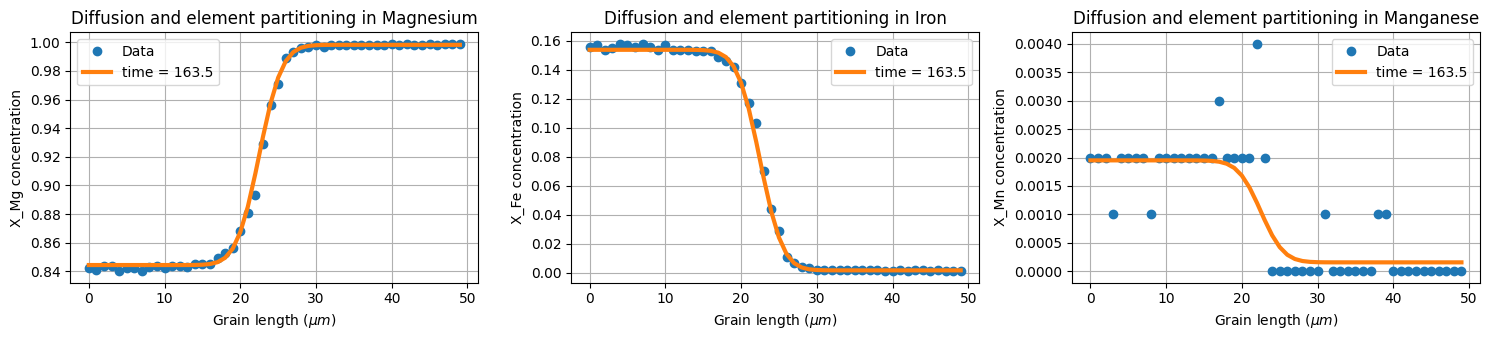

In [4]:
DATA = np.loadtxt('/home/ws1/Computational-Physics-Term-Paper-Project/Element_Partitioning_and_Diffusion/Data_files/PS2_OLID_8.csv', delimiter="\t", skiprows=6)
Dist = DATA[:, 0]           # Length of complete grain in microns
X_Mg = DATA[:, 2]           # Magnesium concentration
X_Fe = DATA[:, 3]           # Iron concentration
X_Mn = DATA[:, 1]           # Manganese concentration

# Constants and parameters
t_max = 164                 # total simulation time
L_grain1 = 23.5             # length of the grain 1
L_grain2 = 50-23.5          # length of the grain 2
dt = 0.5                    # time step
z_max = L_grain1 + L_grain2
dl = z_max / (len(Dist))    # spatial step
tol = 1e-6                  # tolerance for the minimization function

def source_term(x, t):
    return 0

########################################### X_Mg ###########################################

def init_X_Mg_left(X_Mg):
    # Initial condition for at the left side of the Magnesium data - average of the first 20 data points
    return np.average(X_Mg[:20])

def init_X_Mg_right(X_Mg):
    # Initial condition for at the right side of the Magnesium data - average of the last 20 data points
    return np.average(X_Mg[-20:-1])

def func_Mg(Diff):
    # Function to calculate the error for Magnesium
    solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, 
                                                                    init_X_Mg_left, init_X_Mg_right, source_term, 
                                                                    diff_matrix_isolated_boundary_G2)
    # Calculate Root Mean Square Error
    rmse = np.sqrt(np.sum(((X_Mg - solution_Mg[:, -1])**2))/len(X_Mg))
    return rmse

print('Calculating best fit for diffusion coefficient for Magnesium...')
# find the best fit for the diffusion coefficient by bisection method
Diff = find_min_solution(func_Mg, 1e-4, 1, tol=tol)

print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
print('Root mean square error:', func_Mg(Diff))
print()

########################################### X_Fe ###########################################

def init_X_Fe_left(X_Fe):
    # Initial condition for at the left side of the Iron data - average of the first 20 data points
    return np.average(X_Fe[:20])

def init_X_Fe_right(X_Fe):
    # Initial condition for at the right side of the Iron data - average of the last 20 data points
    return np.average(X_Fe[-20:-1])

# def func_Fe(Diff):
#     # Function to calculate the error for Iron
#     solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, 
#                                                                     init_X_Fe_left, init_X_Fe_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Fe - solution_Fe[:, -1])**2))/len(X_Fe))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Fe, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Fe(Diff))
# print()

########################################### X_Fe ###########################################

def init_X_Mn_left(X_Mn):
    # Initial condition for at the left side of the Manganese data - average of the first 20 data points
    return np.average(X_Mn[:20])

def init_X_Mn_right(X_Mn):
    # Initial condition for at the right side of the Manganese data - average of the last 20 data points
    return np.average(X_Mn[-20:-1])

# def func_Mn(Diff):
#     # Function to calculate the error for Manganese
#     solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, 
#                                                                     init_X_Mn_left, init_X_Mn_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Mn - solution_Mn[:, -1])**2))/len(X_Mn))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Mn, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Mn(Diff))
# print()

# Append the values taken from the data file to the arrays
Diffusivity_array.append(Diff)
Temperature_array.append(1100)
fO2_array.append(-12.02)

# Calculate the diffusion equation solution using the best fit diffusion coefficient
solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, init_X_Mg_left, init_X_Mg_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, init_X_Fe_left, init_X_Fe_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, init_X_Mn_left, init_X_Mn_right, source_term, diff_matrix_isolated_boundary_G2)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_Mg, X_Mg, Dist, solution_Fe, X_Fe, solution_Mn, X_Mn)
plt.show()


# OLID 9 data - Obtaining the optimum fit for diffusivity 

Calculating best fit for diffusion coefficient for Magnesium...
Diffusion coefficient: 0.145956 microns^2/hr or 4.0543e-17 m^2/s
Root mean square error: 0.001893334432805917



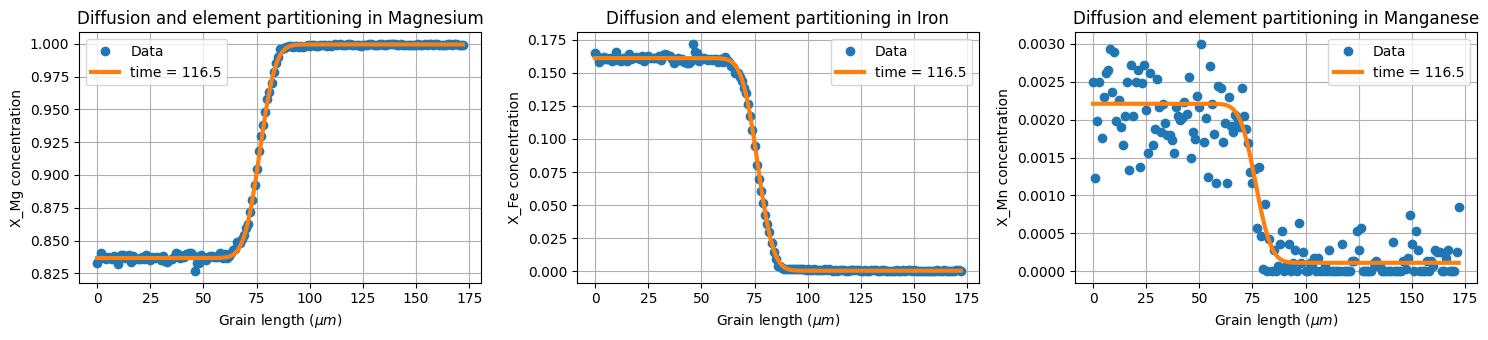

In [5]:
DATA = np.loadtxt('/home/ws1/Computational-Physics-Term-Paper-Project/Element_Partitioning_and_Diffusion/Data_files/PS2_OLID_9.csv', delimiter="\t", skiprows=6)
Dist = DATA[:, 0]           # Length of complete grain in microns
X_Mg = DATA[:, 2]           # Magnesium concentration
X_Fe = DATA[:, 3]           # Iron concentration
X_Mn = DATA[:, 1]           # Manganese concentration

# Constants and parameters
t_max = 117                 # total simulation time
L_grain1 = 77               # length of the grain 1
L_grain2 = 173-77           # length of the grain 2
dt = 0.5                    # time step
z_max = L_grain1 + L_grain2
dl = z_max / (len(Dist))    # spatial step
tol = 1e-6                  # tolerance for the minimization function

def source_term(x, t):
    return 0

########################################### X_Mg ###########################################

def init_X_Mg_left(X_Mg):
    # Initial condition for at the left side of the Magnesium data - average of the first 20 data points
    return np.average(X_Mg[:20])

def init_X_Mg_right(X_Mg):
    # Initial condition for at the right side of the Magnesium data - average of the last 20 data points
    return np.average(X_Mg[-20:-1])

def func_Mg(Diff):
    # Function to calculate the error for Magnesium
    solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, 
                                                                    init_X_Mg_left, init_X_Mg_right, source_term, 
                                                                    diff_matrix_isolated_boundary_G2)
    # Calculate Root Mean Square Error
    rmse = np.sqrt(np.sum(((X_Mg - solution_Mg[:, -1])**2))/len(X_Mg))
    return rmse

print('Calculating best fit for diffusion coefficient for Magnesium...')
# find the best fit for the diffusion coefficient by bisection method
Diff = find_min_solution(func_Mg, 1e-4, 1, tol=tol)

print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
print('Root mean square error:', func_Mg(Diff))
print()

########################################### X_Fe ###########################################

def init_X_Fe_left(X_Fe):
    # Initial condition for at the left side of the Iron data - average of the first 20 data points
    return np.average(X_Fe[:20])

def init_X_Fe_right(X_Fe):
    # Initial condition for at the right side of the Iron data - average of the last 20 data points
    return np.average(X_Fe[-20:-1])

# def func_Fe(Diff):
#     # Function to calculate the error for Iron
#     solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, 
#                                                                     init_X_Fe_left, init_X_Fe_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Fe - solution_Fe[:, -1])**2))/len(X_Fe))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Fe, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Fe(Diff))
# print()

########################################### X_Fe ###########################################

def init_X_Mn_left(X_Mn):
    # Initial condition for at the left side of the Manganese data - average of the first 20 data points
    return np.average(X_Mn[:20])

def init_X_Mn_right(X_Mn):
    # Initial condition for at the right side of the Manganese data - average of the last 20 data points
    return np.average(X_Mn[-20:-1])

# def func_Mn(Diff):
#     # Function to calculate the error for Manganese
#     solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, 
#                                                                     init_X_Mn_left, init_X_Mn_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Mn - solution_Mn[:, -1])**2))/len(X_Mn))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Mn, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Mn(Diff))
# print()

# Append the values taken from the data file to the arrays
Diffusivity_array.append(Diff)
Temperature_array.append(1200)
fO2_array.append(-11.98)

# Calculate the diffusion equation solution using the best fit diffusion coefficient
solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, init_X_Mg_left, init_X_Mg_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, init_X_Fe_left, init_X_Fe_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Mn, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mn, init_X_Mn_left, init_X_Mn_right, source_term, diff_matrix_isolated_boundary_G2)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_Mg, X_Mg, Dist, solution_Fe, X_Fe, solution_Mn, X_Mn)
plt.show()


# OLID 202 data - Obtaining the optimum fit for diffusivity 

Calculating best fit for diffusion coefficient for Magnesium...
Diffusion coefficient: 0.625754 microns^2/hr or 1.7382e-16 m^2/s
Root mean square error: 0.0013911180116470178



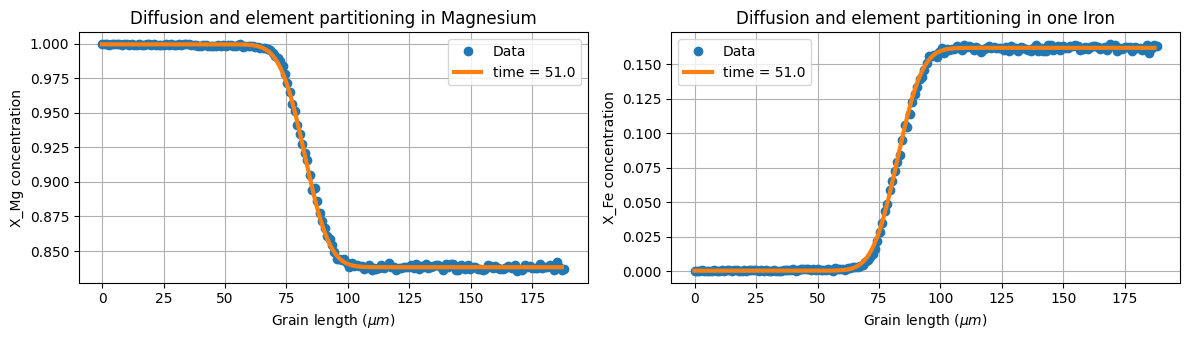

In [6]:
DATA = np.loadtxt('/home/ws1/Computational-Physics-Term-Paper-Project/Element_Partitioning_and_Diffusion/Data_files/PS2_OLID_202.csv', delimiter="\t", skiprows=6)
Dist = DATA[:, 0]           # Length of complete grain in microns
X_Mg = DATA[:, 1]           # Magnesium concentration
X_Fe = DATA[:, 2]           # Iron concentration

# Constants and parameters
t_max = 51.5                # total simulation time
L_grain1 = 83               # length of the grain 1
L_grain2 = 105              # length of the grain 2
dt = 0.5                    # time step
z_max = L_grain1 + L_grain2
dl = z_max / (len(Dist))    # spatial step
tol = 1e-6                  # tolerance for the minimization function

def source_term(x, t):
    return 0

########################################### X_Mg ###########################################

def init_X_Mg_left(X_Mg):
    # Initial condition for at the left side of the Magnesium data - average of the first 20 data points
    return np.average(X_Mg[:20])

def init_X_Mg_right(X_Mg):
    # Initial condition for at the right side of the Magnesium data - average of the last 20 data points
    return np.average(X_Mg[-20:-1])

def func_Mg(Diff):
    # Function to calculate the error for Magnesium
    solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, 
                                                                    init_X_Mg_left, init_X_Mg_right, source_term, 
                                                                    diff_matrix_isolated_boundary_G2)
    # Calculate Root Mean Square Error
    rmse = np.sqrt(np.sum(((X_Mg - solution_Mg[:, -1])**2))/len(X_Mg))
    return rmse

print('Calculating best fit for diffusion coefficient for Magnesium...')
# find the best fit for the diffusion coefficient by bisection method
Diff = find_min_solution(func_Mg, 1e-4, 1, tol=tol)

print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
print('Root mean square error:', func_Mg(Diff))
print()

########################################### X_Fe ###########################################

def init_X_Fe_left(X_Fe):
    # Initial condition for at the left side of the Iron data - average of the first 20 data points
    return np.average(X_Fe[:20])

def init_X_Fe_right(X_Fe):
    # Initial condition for at the right side of the Iron data - average of the last 20 data points
    return np.average(X_Fe[-20:-1])

# def func_Fe(Diff):
#     # Function to calculate the error for Iron
#     solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, 
#                                                                     init_X_Fe_left, init_X_Fe_right, source_term, 
#                                                                     diff_matrix_isolated_boundary_G2)
#     # Calculate Root Mean Square Error
#     rmse = np.sqrt(np.sum(((X_Fe - solution_Fe[:, -1])**2))/len(X_Fe))
#     return rmse

# print('Calculating best fit for diffusion coefficient for Iron...')
# # find the best fit for the diffusion coefficient by bisection method
# Diff = find_min_solution(func_Fe, 1e-4, 1, tol=tol)

# print('Diffusion coefficient:', np.round(Diff, 6), 'microns^2/hr or {:.4e}'.format(Diff*1e-12/3600), 'm^2/s')
# print('Root mean square error:', func_Fe(Diff))
# print()

# Append the values taken from the data file to the arrays
Diffusivity_array.append(Diff)
Temperature_array.append(1300)
fO2_array.append(-12.04)

# Calculate the diffusion equation solution using the best fit diffusion coefficient
solution_Mg, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Mg, init_X_Mg_left, init_X_Mg_right, source_term, diff_matrix_isolated_boundary_G2)
solution_Fe, spatial_grid, time_grid = crank_nicolson_diffusion(L_grain1, L_grain2, t_max, dt, Diff, Diff, X_Fe, init_X_Fe_left, init_X_Fe_right, source_term, diff_matrix_isolated_boundary_G2)

# Plot the diffusion equation solution
plot_diff(time_grid, spatial_grid, solution_Mg, X_Mg, Dist, solution_Fe, X_Fe)
plt.show()


# Calculation of Arrhenius coefficient

The Arrhenius relation is given as

$$ D = D_0 \exp \left(-\dfrac{Q}{RT} \right) $$ 

$D_0$ = Diffusivity at zero temperature

$Q$ = Activation energy

$R$ = Universal gas constant

We will fit the data points from all the samples to obtain the values of Q and D_0.

$$ \ln D = \ln D_0 - \dfrac{Q}{RT} $$
$$ \text{or} \qquad y = c + mx $$
where $x=1/T$, $y=\ln D$, $m=-Q/R$ and $c=\ln D_0$

In [7]:
Diffusivity_array = np.array(Diffusivity_array)
Temperature_array = np.array(Temperature_array)
fO2_array = np.array(fO2_array)

# Defining the linear fitting function
def f(x, m, c):
    return m*x + c

# Fitting the data to the Arrhenius equation
inv_T = 1/(Temperature_array + 273.15)
popt, pcov = curve_fit(f, inv_T, np.log(Diffusivity_array))
m, c = popt
dm, dc = np.sqrt(np.diag(pcov))

print('Slope:', m, '+-', dm)
print('Intercept:', c, '+-', dc)
print()

D0 = np.exp(c)
Q = -m * 8.314

print('Pre-exponential factor:', np.round(D0, 6), 'microns^2/hr or {:.4e}'.format(D0*1e-12/3600), 'm^2/s')
print('Activation Energy:', Q/1e3, 'kJ/mol')
print()

# Calculating the Pearson R coefficient to check the goodness of fit
yfit = m*inv_T + c
pearson_R = pearsonr(np.log(Diffusivity_array), yfit)[0]
print('Pearson R:', pearson_R)


Slope: -28518.752550918445 +- 5032.30560595636
Intercept: 17.421696266370315 +- 3.5691740197937203

Pre-exponential factor: 36825322.07497 microns^2/hr or 1.0229e-08 m^2/s
Activation Energy: 237.10490870833596 kJ/mol

Pearson R: 0.97024594071794


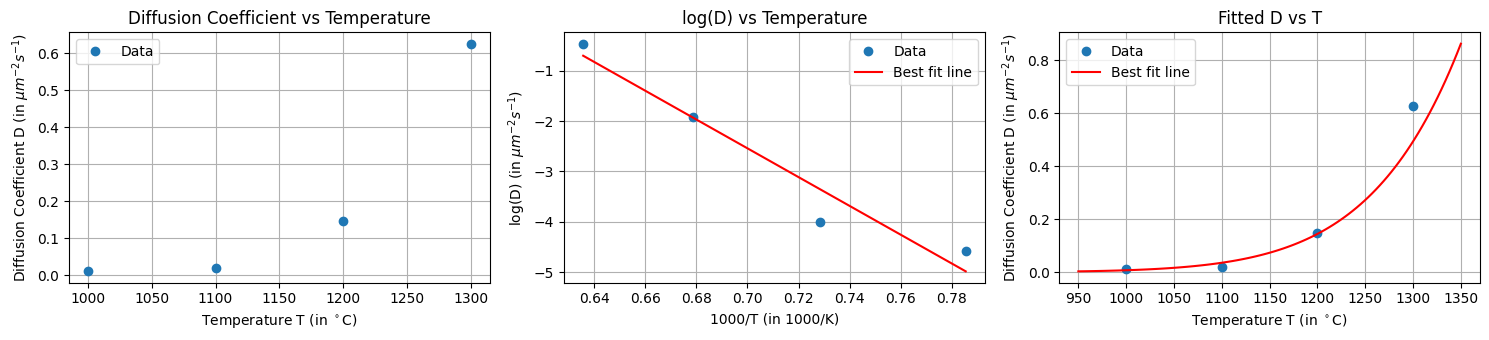

In [8]:
# Plotting the points
plt.figure(figsize=(15, 3.5))
plt.subplot(1, 3, 1)
plt.plot(Temperature_array, Diffusivity_array, 'o', label='Data')
plt.xlabel(r'Temperature T (in $^\circ$C)')
plt.ylabel(r'Diffusion Coefficient D (in $\mu m^{-2}s^{-1}$)')
plt.title('Diffusion Coefficient vs Temperature')
plt.legend()
plt.grid()

# Plotting the log plot and linear fit
plt.subplot(1, 3, 2)
plt.plot(1000*inv_T, np.log(Diffusivity_array), 'o', label='Data')
yfit = [c + m * xi for xi in inv_T]
plt.plot(1000*inv_T, yfit, 'r-', label="Best fit line")
plt.xlabel(r'1000/T (in 1000/K)')
plt.ylabel('log(D) (in $\mu m^{-2}s^{-1}$)')
plt.title('log(D) vs Temperature')
plt.legend()
plt.grid()

# Plotting the Arrhenius plot
plt.subplot(1, 3, 3)
plt.plot(Temperature_array, Diffusivity_array, 'o', label='Data')
X = np.linspace(950, 1350, 100)
Y = D0*np.exp(-Q/(8.314*(np.linspace(950, 1350, 100)+273.15)))
plt.plot(X, Y, 'r-', label='Best fit line')
plt.xlabel(r'Temperature T (in $^\circ$C)')
plt.ylabel(r'Diffusion Coefficient D (in $\mu m^{-2}s^{-1}$)')
plt.title('Fitted D vs T')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


In [9]:
# Function to calculate the diffusion coefficient at a given temperature using the Arrhenius equation
def get_Diff(T, Q=235731.013, D0=32859240.787):
    return D0 * np.exp(-Q/(8.314*(T+273.15)))
